In [3]:
#importamos las librerías
import pandas as pd
import sklearn
import matplotlib.pyplot as plt


#importamos módulos específicos
from sklearn.decomposition import PCA ##algoritmo PCA
from sklearn.decomposition import IncrementalPCA 


#clasificador para hacer comparación de regresión logística

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler ##escalador para normalizar los datos y dejarlos en la escala de 0 y 1

from sklearn.model_selection import train_test_split

if __name__ == "__main__":
    dt_heart = pd.read_csv('./data/heart.csv')

    print(dt_heart.head(5))

    dt_features = dt_heart.drop(['target'], axis = 1) ## Sin la columna target para clasificar de última
    dt_target = dt_heart['target']

    dt_features = StandardScaler().fit_transform(dt_features) ##carga los datos y ajusta el modelo y aplica la transformación 

    X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size=0.3, random_state=42)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [5]:
#validar que nuestros datos estén bien partidos, consultaremos la forma que tienen nuestros datos con el parámetro ".shape"

print(X_train.shape)
print(y_train.shape)

(717, 13)
(717,)


Los datos de nuestro target, solo tiene una columna con el valor binario haciendo referencia si hay presencia de enfermedad cardiaca o no

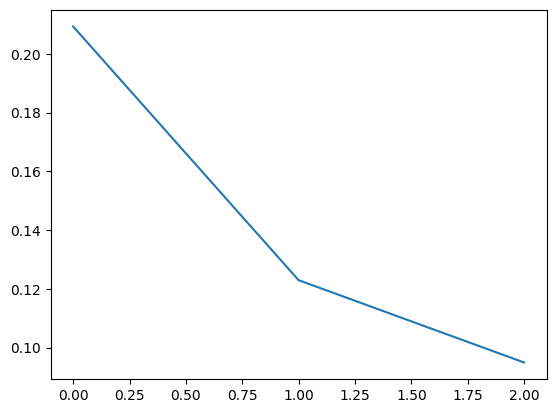

In [7]:
#configurar nuestro algoritmo PCA
#por defecto nuestro numero de componentes:
#n_componentes = min(n_muestras, n_features)
pca = PCA(n_components=3)
pca.fit(X_train) #para ajustar a los datos

ipca = IncrementalPCA(n_components=3, batch_size=10) #batch_size crear bloques poco a poco en este caso 10
ipca.fit(X_train)

plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()

Podemos deducir que las dos primeras variables son las que más nos están aportando más información.

In [10]:
logistic = LogisticRegression(solver='lbfgs') #regresión logística

In [15]:
dt_train = pca.transform(X_train)
dt_test = pca.transform(X_test)
logistic.fit(dt_train, y_train)
print('SCORE PCA: ', logistic.score(dt_test, y_test))

dt_train = ipca.transform(X_train)
dt_test = ipca.transform(X_test)
logistic.fit(dt_train, y_train)
print("SCORE IPCA: ", logistic.score(dt_test, y_test))

SCORE PCA:  0.7857142857142857
SCORE IPCA:  0.8051948051948052


Nos damos cuenta que su rendimiento es casi el mismo, logramos que el dataset tenía 13 features para intentar predecir una clasificación binaria (tiene enfermedad o no), utilizando PCA solo necesitamos 3 features artificiales para llegar a un resultado bueno, nos ahorramos coste computacional y solo utilizamos información que es realmente importante para nuestro modelo.

In [16]:
#algoritmo KERNELPCA
#importamos las librerías
import pandas as pd
import sklearn
import matplotlib.pyplot as plt


#importamos módulos específicos
from sklearn.decomposition import KernelPCA ##algoritmo PCA
from sklearn.decomposition import IncrementalPCA 


#clasificador para hacer comparación de regresión logística

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler ##escalador para normalizar los datos y dejarlos en la escala de 0 y 1

from sklearn.model_selection import train_test_split

if __name__ == "__main__":
    dt_heart = pd.read_csv('./data/heart.csv')

    print(dt_heart.head(5))

    dt_features = dt_heart.drop(['target'], axis = 1) ## Sin la columna target para clasificar de última
    dt_target = dt_heart['target']

    dt_features = StandardScaler().fit_transform(dt_features) ##carga los datos y ajusta el modelo y aplica la transformación 

    X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size=0.3, random_state=42)


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [21]:
kpca = KernelPCA(n_components=4, kernel='poly')
kpca.fit(X_train)

dt_train = kpca.transform(X_train)
dt_test = kpca.transform(X_test)

logistic = LogisticRegression(solver='lbfgs')

logistic.fit(dt_train, y_train)
print("SCORE KPCA: ", logistic.score(dt_test, y_test))



SCORE KPCA:  0.7987012987012987
